# NBA Data set
#### This NBA games data comprises of a dataset with all games from the 2004 season to December 2020. The source of this information is from Kaggle (https://www.kaggle.com/nathanlauga/nba-games). The purpose of this dataset is to conduct a variety of comparative analyses to help us understand the strengths and weaknesses of certain players and teams in the NBA. We will also look to see what player/team statistics correlate to success in an NBA regular season. This data contains five datasets where they are all interconnected with each other. The players.csv data set contains 7229 objects with 4 attributes regarding information about the players currently in the NBA. The teams.csv data set has 31 objects with 14 attributes on information about NBA team stats, the ranking.csv dataset contains 198,343 objects and 12 attributes concerning the ranks amongst teams throughout each game. The games_details.csv has 626,112 objects and 29 attributes providing detailed data for each game, and finally, the games.csv dataset comprises of 25,025 objects with 21 attributes regarding general information about each game. The overall purpose of each dataset is to provide a better outlook of the NBA teams and how this information can be used to improve their performance in defence/offence in the game or analysis of future outcomes in the game.

# Table of contents
1. [Creating files for each task](#File)
2. [Task1](#Task1)
3. [Task2](#Task2)
4. [Task3](#Task3)
5. [Task4](#Task4)
6. [Task5](#Task5)
7. [Task6](#Task6)
8. [Task7](#Task7)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import joblib
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

from time import time
%matplotlib inline
import os
from sklearn import tree
import pydotplus 
from IPython.display import Image



import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


data = pd.read_csv('games_details.csv')
data.head(30)
games= pd.read_csv('games.csv')
rankings = pd.read_csv('ranking.csv')
players= pd.read_csv('players.csv')
teams= pd.read_csv('teams.csv')


/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Clean continuous variables
    1. Fill in missing values
    2. Drop irrelevant/repetitive rows that have null values 


In [2]:
data.isnull().sum()


GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                  102360
FGA                  102360
FG_PCT               102360
FG3M                 102360
FG3A                 102360
FG3_PCT              102360
FTM                  102360
FTA                  102360
FT_PCT               102360
OREB                 102360
DREB                 102360
REB                  102360
AST                  102360
STL                  102360
BLK                  102360
TO                   102360
PF                   102360
PTS                  102360
PLUS_MINUS           126021
dtype: int64

In [3]:
 games.isnull().sum()
# rankings.isnull().sum()
# players.isnull().sum()
# teams.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [4]:

# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = data[ data['FGM'].isnull() ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.head(30)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


In [5]:
# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = games[ games['FG_PCT_away'].isnull() ].index
# Delete these row indexes from dataFrame
games.drop(indexNames , inplace=True)
games.head(30)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1
5,2021-11-17,22100218,Final,1610612752,1610612753,2021,1610612752,98.0,0.420,0.667,...,25.0,45.0,1610612753,104.0,0.406,0.833,0.289,20.0,51.0,0
6,2021-11-17,22100219,Final,1610612749,1610612747,2021,1610612749,109.0,0.460,0.708,...,22.0,52.0,1610612747,102.0,0.417,0.833,0.279,24.0,48.0,1
7,2021-11-17,22100220,Final,1610612750,1610612758,2021,1610612750,107.0,0.500,0.833,...,20.0,35.0,1610612758,97.0,0.366,0.760,0.263,19.0,47.0,1
8,2021-11-17,22100221,Final,1610612760,1610612745,2021,1610612760,101.0,0.446,0.563,...,18.0,56.0,1610612745,89.0,0.356,0.684,0.286,16.0,46.0,1
9,2021-11-17,22100222,Final,1610612756,1610612742,2021,1610612756,105.0,0.441,0.714,...,27.0,49.0,1610612742,98.0,0.413,1.000,0.500,28.0,50.0,1


In [6]:
games.isnull().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

#### Drop irrelevant/repetitive variables such as NICKNAME and COMMENT

In [7]:
data.drop(['NICKNAME'], axis=1, inplace=True)
data.drop(['COMMENT'], axis=1, inplace=True)
data.drop(['TEAM_ABBREVIATION'], axis=1, inplace=True)
data.drop(['TEAM_CITY'], axis=1, inplace=True)

# creating files for each task <a name="File"></a>

In [8]:
cleaned_data= data
cleaned_data.to_csv('cleanedGD.csv', index=False)
tsk1=pd.read_csv('cleanedGD.csv')
tsk2=pd.read_csv('cleanedGD.csv')
tsk3=pd.read_csv('cleanedGD.csv')
tsk4=pd.read_csv('cleanedGD.csv')
tsk5=pd.read_csv('cleanedGD.csv')

cleaned_games= games
cleaned_games.to_csv('cleanedGDgames.csv', index=False)
tsk1games= pd.read_csv('cleanedGDgames.csv')


### Task 1 File creations  

##### games_details  File creations  

In [9]:
tsk1.drop(['GAME_ID'], axis=1, inplace=True)
tsk1.drop(['TEAM_ID'], axis=1, inplace=True)
tsk1.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk1.drop(['MIN'], axis=1, inplace=True)
tsk1.drop(['FGM'], axis=1, inplace=True)
tsk1.drop(['FGA'], axis=1, inplace=True)
tsk1.drop(['FG3M'], axis=1, inplace=True)
tsk1.drop(['FG3A'], axis=1, inplace=True)
tsk1.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk1.drop(['DREB'], axis=1, inplace=True)
tsk1.drop(['OREB'], axis=1, inplace=True)
tsk1.drop(['FTM'], axis=1, inplace=True)
tsk1.drop(['FTA'], axis=1, inplace=True)
tsk1.drop(['TO'], axis=1, inplace=True)
tsk1.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
tsk1.drop(['FG_PCT'], axis=1, inplace=True)
tsk1.drop(['FG3_PCT'], axis=1, inplace=True)
tsk1.drop(['FT_PCT'], axis=1, inplace=True)
tsk1.drop(['PF'], axis=1, inplace=True)
tsk1.drop(['BLK'], axis=1, inplace=True)
tsk1.head()
task_1= tsk1
task_1.to_csv('216359770-215614720-216846396-T1.csv', index=False)
t1 = pd.read_csv('216359770-215614720-216846396-T1.csv')

#### games  File creations  

In [10]:
tsk1games.drop(['GAME_DATE_EST'], axis=1, inplace=True)
tsk1games.drop(['GAME_ID'], axis=1, inplace=True)
tsk1games.drop(['GAME_STATUS_TEXT'], axis=1, inplace=True)
tsk1games.drop(['HOME_TEAM_ID'], axis=1, inplace=True)
tsk1games.drop(['VISITOR_TEAM_ID'], axis=1, inplace=True)
tsk1games.drop(['SEASON'], axis=1, inplace=True)
tsk1games.drop(['TEAM_ID_home'], axis=1, inplace=True)
# tsk1games.drop(['PTS_home'], axis=1, inplace=True)
# tsk1games.drop(['FG_PCT_home'], axis=1, inplace=True)
# tsk1games.drop(['FT_PCT_home'], axis=1, inplace=True)
# tsk1games.drop(['FG3_PCT_home'], axis=1, inplace=True)
tsk1games.drop(['AST_home'], axis=1, inplace=True)
tsk1games.drop(['REB_home'], axis=1, inplace=True)
tsk1games.drop(['TEAM_ID_away'], axis=1, inplace=True)
tsk1games.drop(['PTS_away'], axis=1, inplace=True)
tsk1games.drop(['FG_PCT_away'], axis=1, inplace=True)
tsk1games.drop(['FT_PCT_away'], axis=1, inplace=True)
tsk1games.drop(['FG3_PCT_away'], axis=1, inplace=True)
tsk1games.drop(['AST_away'], axis=1, inplace=True)
tsk1games.drop(['REB_away'], axis=1, inplace=True)
task_1_games= tsk1games
task_1_games.to_csv('216359770-215614720-216846396-T1_games.csv', index=False)
t1_games = pd.read_csv('216359770-215614720-216846396-T1_games.csv')

#### rankings  File creations  

In [11]:
task_5_games= tsk1games
task_5_games.to_csv('216359770-215614720-216846396-T5_games.csv', index=False)
t5_games = pd.read_csv('216359770-215614720-216846396-T5_games.csv')

In [12]:
rankings = pd.read_csv('ranking.csv')
rankings= rankings[rankings['G']==82]
rankings.drop(['STANDINGSDATE'], axis=1, inplace=True)
rankings.drop(['G'], axis=1, inplace=True)
rankings.drop_duplicates(inplace=True)

In [13]:
maxWins= rankings.groupby('SEASON_ID').max()
minWins=  rankings.groupby('SEASON_ID').min()

In [14]:
# rankings.drop(['TEAM_ID'], axis=1, inplace=True)

rankings.drop(['LEAGUE_ID'], axis=1, inplace=True)
rankings.drop(['CONFERENCE'], axis=1, inplace=True)
rankings.drop(['TEAM_ID'], axis=1, inplace=True)
rankings.drop(['HOME_RECORD'], axis=1, inplace=True)
rankings.drop(['ROAD_RECORD'], axis=1, inplace=True)
rankings.drop(['RETURNTOPLAY'], axis=1, inplace=True)
task_1_rankings= rankings
task_1_rankings.to_csv('216359770-215614720-216846396-T1_rankings.csv', index=False)
t1_rankings = pd.read_csv('216359770-215614720-216846396-T1_rankings.csv')
t1_rankings.head()

,SEASON_ID,TEAM,W,L,W_PCT
0,22013,San Antonio,62,20,0.756
1,22013,Oklahoma City,59,23,0.720
2,22013,L.A. Clippers,57,25,0.695
3,22013,Houston,54,28,0.659
4,22013,Portland,54,28,0.659


### Task 2: File creation
Basic Statistical Analysis: From your data set, select one dimension of each kind: Nominal, Ordinal, Interval, Ratio.

In [15]:
tsk2.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk2['START_POSITION'] = tsk2['START_POSITION'].map(START_POSITION_num)
tsk2['START_POSITION'] = tsk2['START_POSITION'].replace(np.nan, 4)
tsk2['PLUS_MINUS'].fillna(tsk2['PLUS_MINUS'].mean(), inplace=True)
tsk2.isnull().sum()
task_2= tsk2
task_2.to_csv('216359770-215614720-216846396-T2.csv', index=False)
t2 = pd.read_csv('216359770-215614720-216846396-T2.csv')
t2.head()

,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,203484,Kentavious Caldwell-Pope,1.0,27:41,1.0,6.0,0.167,0.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,1628398,Kyle Kuzma,1.0,30:28,2.0,12.0,0.167,1.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,1629655,Daniel Gafford,2.0,24:21,9.0,12.0,0.750,0.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,203078,Bradley Beal,3.0,35:07,9.0,20.0,0.450,5.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,203915,Spencer Dinwiddie,3.0,28:34,0.0,5.0,0.000,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


### Task 3: File creation
Standardization and Normalization: Select two dimensions, one Interval and one Ratio; dimensions from Task2 may be reused.

In [16]:
tsk3.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk3['START_POSITION'] = tsk3['START_POSITION'].map(START_POSITION_num)
tsk3['START_POSITION'] = tsk3['START_POSITION'].replace(np.nan, 4)
tsk3['PLUS_MINUS'].fillna(tsk3['PLUS_MINUS'].mean(), inplace=True)
tsk3.isnull().sum()
tsk3.drop(['GAME_ID'], axis=1, inplace=True)
tsk3.drop(['TEAM_ID'], axis=1, inplace=True)
tsk3.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk3.drop(['MIN'], axis=1, inplace=True)
tsk3.drop(['FGM'], axis=1, inplace=True)
tsk3.drop(['FGA'], axis=1, inplace=True)
tsk3.drop(['FG3M'], axis=1, inplace=True)
tsk3.drop(['FG3A'], axis=1, inplace=True)
tsk3.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk3.drop(['DREB'], axis=1, inplace=True)
tsk3.drop(['OREB'], axis=1, inplace=True)
tsk3.drop(['FTM'], axis=1, inplace=True)
tsk3.drop(['FTA'], axis=1, inplace=True)
tsk3.drop(['TO'], axis=1, inplace=True)
tsk3.drop(['PLAYER_NAME'], axis=1, inplace=True)
tsk3.drop(['START_POSITION'], axis=1, inplace=True)
# tsk2.drop(['FG_PCT'], axis=1, inplace=True)
tsk3.drop(['FG3_PCT'], axis=1, inplace=True)
tsk3.drop(['FT_PCT'], axis=1, inplace=True)
tsk3.drop(['PF'], axis=1, inplace=True)
tsk3.drop(['BLK'], axis=1, inplace=True)
tsk3.drop(['REB'], axis=1, inplace=True)
tsk3.drop(['STL'], axis=1, inplace=True)
tsk3.drop(['AST'], axis=1, inplace=True)
task_3= tsk3
task_3.to_csv('216359770-215614720-216846396-T3.csv', index=False)
t3 = pd.read_csv('216359770-215614720-216846396-T3.csv')
t3.head()

,FG_PCT,PTS
0,0.167,3.0
1,0.167,5.0
2,0.750,20.0
3,0.450,24.0
4,0.000,0.0


### Task 4: File creation  <a name="Task4"></a>
Principal Component Analysis preprocessing: convert name attributes into numerical and remove rest NaN and delete extra dimensions


In [17]:
tsk4.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk4['START_POSITION'] = tsk4['START_POSITION'].map(START_POSITION_num)
tsk4['START_POSITION'] = tsk4['START_POSITION'].replace(np.nan, 4)
tsk4['PLUS_MINUS'].fillna(tsk4['PLUS_MINUS'].mean(), inplace=True)
tsk4.isnull().sum()
tsk4.drop(['GAME_ID'], axis=1, inplace=True)
tsk4.drop(['TEAM_ID'], axis=1, inplace=True)
tsk4.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk4.drop(['MIN'], axis=1, inplace=True)
tsk4.drop(['FGM'], axis=1, inplace=True)
tsk4.drop(['FGA'], axis=1, inplace=True)
tsk4.drop(['FG3M'], axis=1, inplace=True)
tsk4.drop(['FG3A'], axis=1, inplace=True)
tsk4.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk4.drop(['DREB'], axis=1, inplace=True)
tsk4.drop(['OREB'], axis=1, inplace=True)
tsk4.drop(['FTM'], axis=1, inplace=True)
tsk4.drop(['FTA'], axis=1, inplace=True)
tsk4.drop(['TO'], axis=1, inplace=True)
tsk4.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
# t1.drop(['FG_PCT'], axis=1, inplace=True)
# t1.drop(['FG3_PCT'], axis=1, inplace=True)
# t1.drop(['FT_PCT'], axis=1, inplace=True)
# t1.drop(['PF'], axis=1, inplace=True)


task_4= tsk4
task_4.to_csv('216359770-215614720-216846396-T4.csv', index=False)
t4 = pd.read_csv('216359770-215614720-216846396-T4.csv')
t4.head()

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.0,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.0,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.4,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.0,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.0,3.0,2.0,0.0,0.0,1.0,0.0


### Task 5: File creation <a name="Task5"></a>
Similarity Measurement select any 5 numeric dimensions and leave the additional.
Submit your filtered data, the data for the selected dimensions.

In [18]:
# task_5_games= tsk1games
# task_5_games.to_csv('216359770-215614720-216846396-T5_games.csv', index=False)
# t5_games = pd.read_csv('216359770-215614720-216846396-T5_games.csv')

### Preprocessing data - combine data from games.csv and games_details.csv
#### join on games.csv and games_details.csv. add the percentage of 2 point shots successfully made, to the games.csv table


In [19]:
details = pd.read_csv('games_details.csv')
# 'FG3_PCT','FG_PCT',
details=details[details.columns.drop(['TEAM_ABBREVIATION','TEAM_CITY','PLAYER_ID','PLAYER_NAME','NICKNAME','START_POSITION','COMMENT','MIN','PLUS_MINUS'])]
data = pd.read_csv('games.csv')
mean_hpts = data['PTS_home'].mean()
# get the null columns and store them in 'a'
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
a = data[data["REB_away"].isnull()][null_columns]
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
a = data[data["REB_away"].isnull()][null_columns]
a = data[data["REB_away"].isnull()]
# drops all rows with any null columns
data = data.dropna(axis=0,how='any')
data['HOME_TEAM_WINS'] = data['HOME_TEAM_WINS'].replace([1], 'HOME WIN')
data['HOME_TEAM_WINS'] = data['HOME_TEAM_WINS'].replace([0], 'HOME LOSS')
details = details.groupby(['GAME_ID','TEAM_ID']).sum()
details['FG_PCT'] = round(details['FGM']/details['FGA'],3)
details['FT_PCT'] = round(details['FTM']/details['FTA'],3)
details['FG3_PCT'] = round(details['FG3M']/details['FG3A'],3)
details=details.assign(FG2M=(details['FGM']-details['FG3M']))
details=details.assign(FG2A=(details['FGA']-details['FG3A']))
details=details.assign(FG2_PCT=(details['FG2M']/details['FG2A']))
details['FG2_PCT'] = round(details['FG2M']/details['FG2A'],3)
details
# 
# data_2018

/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


FGM    FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  \
GAME_ID  TEAM_ID                                                            
10300001 1610612742  34.0   76.0   0.447   2.0   8.0    0.250  15.0  30.0   
         1610612762  32.0   70.0   0.457   1.0   7.0    0.143  25.0  34.0   
10300002 1610612749  32.0   75.0   0.427   2.0  13.0    0.154  28.0  40.0   
         1610612763  40.0   81.0   0.494   4.0  15.0    0.267  21.0  34.0   
10300003 1610612739  38.0   77.0   0.494   4.0   6.0    0.667  20.0  29.0   
...                   ...    ...     ...   ...   ...      ...   ...   ...   
52000131 1610612763  40.0   90.0   0.444   7.0  22.0    0.318  13.0  24.0   
52000201 1610612754  41.0  100.0   0.410  15.0  41.0    0.366  18.0  21.0   
         1610612764  54.0   93.0   0.581  14.0  28.0    0.500  20.0  26.0   
52000211 1610612744  42.0   94.0   0.447  12.0  34.0    0.353  16.0  20.0   
         1610612763  40.0   98.0   0.408  15.0  35.0    0.429  22.0  26.0   

                     FT_PCT  OREB  ...   REB   AST   STL   BLK    TO    PF  \
GAME_ID  TEAM_ID                   ...                                       
10300001 1610612742   0.500  12.0  ...  38.0  20.0   9.0   4.0  18.0  34.0   
         1610612762   0.735   9.0  ...  41.0  23.0   8.0   4.0  18.0  26.0   
10300002 1610612749   0.700  11.0  ...  43.0  20.0   9.0   4.0  24.0  26.0   
         1610612763   0.618  14.0  ...  48.0  25.0  18.0   7.0  25.0  35.0   
10300003 1610612739   0.690  12.0  ...  52.0  25.0  10.0   7.0  25.0  33.0   
...                     ...   ...  ...   ...   ...   ...   ...   ...   ...   
52000131 1610612763   0.542  11.0  ...  56.0  18.0   4.0  11.0   9.0  19.0   
52000201 1610612754   0.857   9.0  ...  40.0  30.0   9.0   4.0  14.0  19.0   
         1610612764   0.769   7.0  ...  52.0  34.0   7.0   9.0  15.0  20.0   
52000211 1610612744   0.800  11.0  ...  48.0  30.0   7.0   7.0  21.0  23.0   
         1610612763   0.846  16.0  ...  47.0  22.0  14.0   6.0  13.0  23.0   

                       PTS  FG2M  FG2A  FG2_PCT  
GAME_ID  TEAM_ID                                 
10300001 1610612742   85.0  32.0  68.0    0.471  
         1610612762   90.0  31.0  63.0    0.492  
10300002 1610612749   94.0  30.0  62.0    0.484  
         1610612763  105.0  36.0  66.0    0.545  
10300003 1610612739  100.0  34.0  71.0    0.479  
...                    ...   ...   ...      ...  
52000131 1610612763  100.0  33.0  68.0    0.485  
52000201 1610612754  115.0  26.0  59.0    0.441  
         1610612764  142.0  40.0  65.0    0.615  
52000211 1610612744  112.0  30.0  60.0    0.500  
         1610612763  117.0  25.0  63.0    0.397  

[49763 rows x 21 columns]

#### use data from the Toronto Raptors 2017 season as a training set, and use it to predict the results of the Toronto Raptors 2018 season (test set)

In [20]:
h=100
data_2018 = data[data['SEASON'] == 2018]#.head(h)
data_2017 = data[data['SEASON'] == 2017]#.head(h)
data_2017=data_2017[data_2017['HOME_TEAM_ID']==1610612761]
data_2018=data_2018[data_2018['HOME_TEAM_ID']==1610612761]
drop_atts = ['GAME_DATE_EST','GAME_STATUS_TEXT','VISITOR_TEAM_ID','SEASON','TEAM_ID_home','TEAM_ID_away']
data_2018=data_2018[data_2018.columns.drop(drop_atts)]
data_2017=data_2017[data_2017.columns.drop(drop_atts)]
data_2017=data_2017.rename(columns={'HOME_TEAM_ID':'TEAM_ID'})
data_2018=data_2018.rename(columns={'HOME_TEAM_ID':'TEAM_ID'})
# details.set_index('GAME_ID').join(data_2017.set_index('GAME_ID'))
# details=details.assign(TEAM=(details['TEAM_ID']*1))
data_17=pd.merge(details, data_2017, on=["GAME_ID","TEAM_ID"])
data_18=pd.merge(details, data_2018, on=["GAME_ID","TEAM_ID"])
# details
# data_2017
# data_17
data_17=data_17[data_17.columns.drop(['TEAM_ID'])]
data_18=data_18[data_18.columns.drop(['TEAM_ID'])]


#### Set the X and Y values for the training set. Only keep the 3-point shooting percentage, 2-point shooting percentage, and free-point shooting percentage in the X-table to see which was most important for success.


In [21]:

# split into X and Y
Y_2017 = data_17['HOME_TEAM_WINS']
# 'FG3_PCT_home','FG3_PCT_away','FG_PCT_home','FG_PCT_away','PTS_home', 'PTS_away','AST_away','AST_home'
drop_cols=['FG2A','FG2M','REB_home','AST_home','FG3_PCT_home','FT_PCT_home','FG_PCT_home','PTS_home','GAME_ID','BLK','TO','PF','STL','AST','REB','DREB','OREB','FGM','FGA','FG3M','FG3A','FTM','FTA','HOME_TEAM_WINS','FG3_PCT_away','FG_PCT_away', 'PTS_away','AST_away','FT_PCT_away','REB_away']
X_2017 = data_17[data_17.columns.drop(drop_cols)]
X_2017
# data_2018

,FG_PCT,FG3_PCT,FT_PCT,PTS,FG2_PCT
0,0.494,0.256,0.800,119.0,0.794
1,0.519,0.351,0.840,116.0,0.667
2,0.470,0.448,0.929,117.0,0.481
3,0.472,0.295,0.838,128.0,0.644
4,0.462,0.208,0.630,96.0,0.571
5,0.543,0.520,0.750,119.0,0.554
6,0.459,0.381,0.696,122.0,0.518
7,0.564,0.346,0.909,107.0,0.673
8,0.444,0.256,0.714,100.0,0.588
9,0.531,0.438,0.727,126.0,0.576


# Task 1: Describing the Data <a name="Task1"></a>

## games details dataset

In [22]:
t1.head()

,START_POSITION,REB,AST,STL,PTS
0,F,6.0,2.0,1.0,3.0
1,F,5.0,3.0,1.0,5.0
2,C,9.0,1.0,2.0,20.0
3,G,3.0,7.0,2.0,24.0
4,G,3.0,2.0,0.0,0.0


### What positions accumulated the most points?

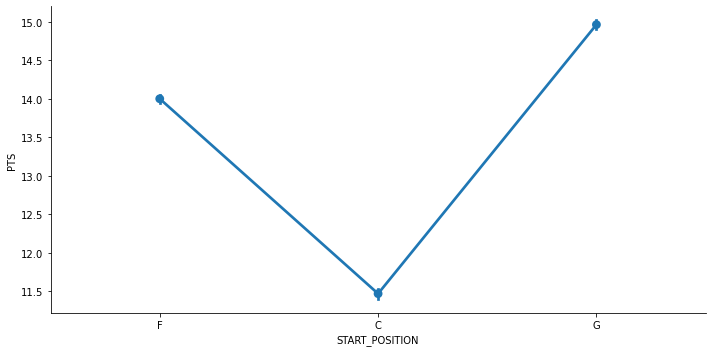

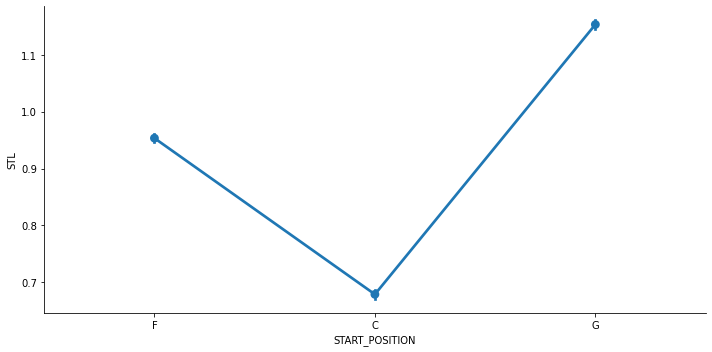

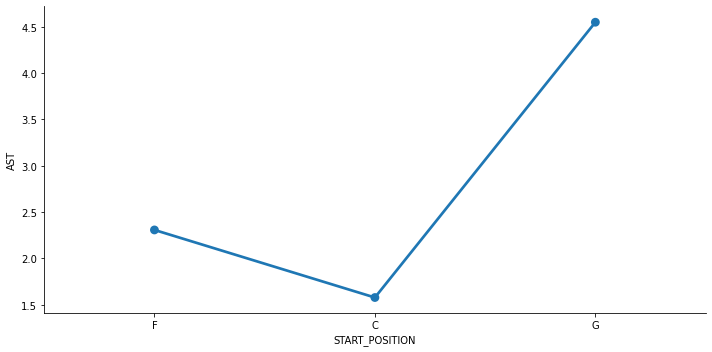

<Figure size 432x288 with 0 Axes>

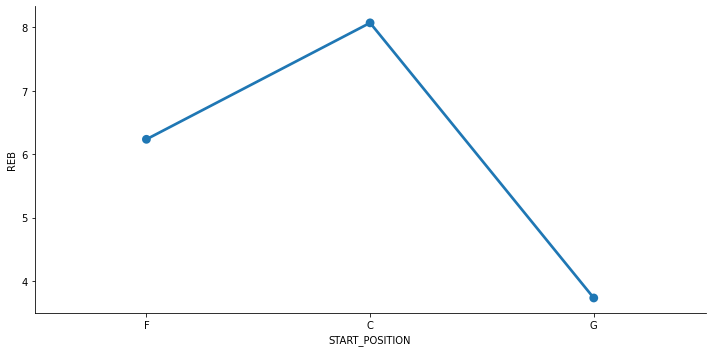

In [23]:
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='PTS', data=t1, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='STL', data=t1, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='AST', data=t1, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='REB', data=t1, kind='point', aspect=2, )


##### When comparing the average points (PTS) of each starting position it is prevalent that guards make the most points followed by forwards and finally centers. In terms of steals (STL) and assists (AST), it is the same order with guards having the most steals followed by forwards and lastly centers. When looking at rebounds it is no surprise that centers have the most as they are the closest to the net. We  chose a line graph to represent the data to see the correlation between starting position and the different player stats, this will help us understand the data better and visualise the correlation  

## games dataset

In [24]:
t1_games.head()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,HOME_TEAM_WINS
0,97.0,0.438,0.500,0.313,1
1,97.0,0.425,0.750,0.286,1
2,110.0,0.506,0.833,0.351,1
3,109.0,0.458,0.840,0.375,1
4,113.0,0.483,0.824,0.375,1


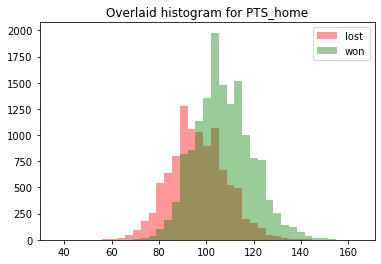

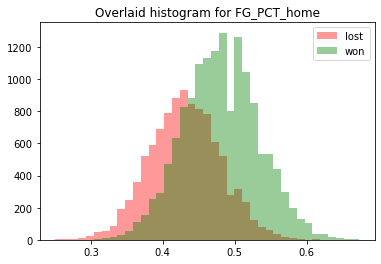

In [25]:
for i in ['PTS_home', 'FG_PCT_home']:
    lost = list(t1_games[t1_games['HOME_TEAM_WINS'] == 0][i].dropna())
    won = list(t1_games[t1_games['HOME_TEAM_WINS'] == 1][i].dropna())
    xmin = min(min(lost), min(won))
    xmax = max(max(lost), max(won))
    width = (xmax - xmin) / 40
    sb.distplot(lost, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sb.distplot(won, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['lost', 'won'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

#### here we have an overlaid histogram showing the games won and lost with the number of points a team got, with this analysis, we can observe that total points were around 100 per game. however, looking at the field goal percentage we can observe that the winning teams scored a higher percentage which is inevitable. A Histogram was in order to visualize the data in terms of wins and losses. 

## rankings dataset

## How has the range in wins between the worst team in the league and the best team in the league changed over time?

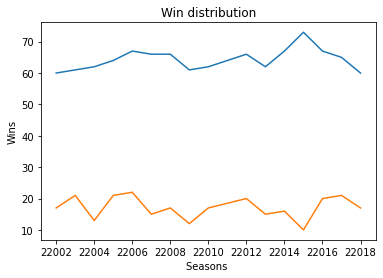

In [26]:

import matplotlib.pyplot as plt

plt.plot(maxWins.index,maxWins['W'])
plt.plot(minWins.index,minWins['W'])
plt.title('Win distribution')
plt.xlabel('Seasons ')
plt.ylabel('Wins')
plt.show()


## this tells us that the league has stayed evenly throughout the years however in 2015 the wins between the worst and best team was the highest making the league less competiv=tive and more predictive 

The current NBA team with the best record are the Golden State and Phoenix,  

In [27]:
t1_rankings.groupby('TEAM').mean().sort_values(["W_PCT"], ascending=True)


,SEASON_ID,W,L,W_PCT
TEAM,,,,
New York,22009.937500,31.750000,50.250000,0.387063
Minnesota,22009.937500,32.875000,49.125000,0.400875
Charlotte,22011.000000,34.142857,47.857143,0.416357
Brooklyn,22015.000000,34.571429,47.428571,0.421571
Philadelphia,22009.937500,34.875000,47.125000,0.425250
Sacramento,22009.937500,35.062500,46.937500,0.427563
Seattle,22004.500000,35.833333,46.166667,0.437000
Washington,22009.937500,36.562500,45.437500,0.445875
New Jersey,22006.000000,36.888889,45.111111,0.450000


this shows that the San Antonio Spurs have the best win-loss percentage of all time with 65.39%, and the Charlotte Hornets has the worst at 38.5%

In [28]:
t1_rankings.describe()

,SEASON_ID,W,L,W_PCT
count,476.000000,476.000000,476.000000,476.000000
mean,22009.960084,40.981092,41.018908,0.499773
std,5.044693,12.403126,12.403126,0.151306
min,22002.000000,10.000000,9.000000,0.122000
25%,22006.000000,32.000000,32.000000,0.390000
50%,22009.500000,42.000000,40.000000,0.512000
75%,22015.000000,50.000000,50.000000,0.610000
max,22018.000000,73.000000,72.000000,0.890000


## Players and dataset are already in games_details, games

# Task 2: <a name="Task2"></a>

Select a suitable table/object type from your data set for clustering analysis. If you have too many
data rows in this table, then only keep 1000 rows

In [29]:
t2.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,5.237510e+05,5.237510e+05,5.237510e+05,523751.000000,523751.000000,523751.000000,523751.000000,523751.000000,523751.00000,523751.000000,...,523751.000000,523751.000000,523751.000000,523751.00000,523751.000000,523751.000000,523751.000000,523751.000000,523751.000000,523751.000000
mean,2.158135e+07,1.610613e+09,3.315081e+05,3.085936,3.574498,7.878062,0.415843,0.753051,2.11503,0.197427,...,1.028187,3.026999,4.055187,2.09036,0.722950,0.461782,1.325151,2.006984,9.640753,-0.000356
std,5.649759e+06,8.666388e+00,7.689801e+06,1.165440,3.019116,5.657840,0.251636,1.205652,2.52168,0.289293,...,1.401890,2.685872,3.487341,2.46903,0.974351,0.865591,1.402568,1.503485,8.039700,10.369424
min,1.030000e+07,1.610613e+09,1.500000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.060079e+07,1.610613e+09,2.412000e+03,2.000000,1.000000,3.000000,0.250000,0.000000,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,3.000000,-6.000000
50%,2.120008e+07,1.610613e+09,2.008260e+05,4.000000,3.000000,7.000000,0.429000,0.000000,1.00000,0.000000,...,1.000000,2.000000,3.000000,1.00000,0.000000,0.000000,1.000000,2.000000,8.000000,-0.000356
75%,2.170015e+07,1.610613e+09,2.030810e+05,4.000000,5.000000,11.000000,0.571000,1.000000,3.00000,0.375000,...,2.000000,4.000000,6.000000,3.00000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,5.200021e+07,1.610613e+09,1.962938e+09,4.000000,28.000000,50.000000,1.000000,14.000000,24.00000,1.000000,...,18.000000,25.000000,31.000000,25.00000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


With this information we can observe that:

**Observation1:** There are no missing values in the data set after cleaning the data

**Observation2:** Our target variable START_POSITION is catigorical

**Observation3:** FG_PCT have limited range of values



In [30]:
median= np.median(t2['PTS'])
median


8.0

# Task 3: <a name="Task3"></a>
### Select two dimensions, one Interval and one Ratio; dimensions from Task2 may be reused.
• For each selected dimension, perform:
o Z-score standardization and
o Min-Max normalization

In [31]:
t3.describe()

,FG_PCT,PTS
count,523751.000000,523751.000000
mean,0.415843,9.640753
std,0.251636,8.039700
min,0.000000,0.000000
25%,0.250000,3.000000
50%,0.429000,8.000000
75%,0.571000,14.000000
max,1.000000,81.000000


### min-max normalization graph

True


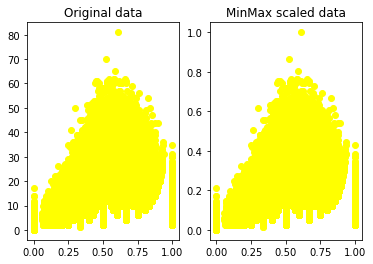

In [32]:
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# use the Games_detail dataset
X= t3
y= t3
X.shape
# (523751, 2) # 523751 samples (rows) with 2 features/variables (columns)
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X)
# transform the test test
X_scaled = scaler.transform(X)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])
# Manually normalise without using scikit-learn
X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# Verify manually VS scikit-learn estimation
print(np.allclose(X_scaled, X_manual_scaled))
#True
fig, axes = plt.subplots(1,2)
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c="yellow")
axes[0].set_title("Original data")
axes[1].scatter(X_scaled[:,0], X_scaled[:,1], c="yellow")
axes[1].set_title("MinMax scaled data")
plt.show()



#### with this min-max normalization, we can see there is no significant difference between the original and the min-max normalization. This is due to the data already having a similar scale. 

##### The MinMax scaling effect on the first 2 features of the games_detail dataset.


In [33]:
t3['FG_PCT zscore'] = stats.zscore(t3['FG_PCT'])
t3['PTS zscore'] = stats.zscore(t3['PTS'])
print(t3.head())

   FG_PCT   PTS  FG_PCT zscore  PTS zscore
0   0.167   3.0      -0.988903   -0.825996
1   0.167   5.0      -0.988903   -0.577230
2   0.750  20.0       1.327941    1.288513
3   0.450  24.0       0.135740    1.786044
4   0.000   0.0      -1.652562   -1.199145


Calculated the Zscore for both dimensions

In [34]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(t3)
scaled1[:5]
pd.DataFrame(t3).describe().head(3)


,FG_PCT,PTS,FG_PCT zscore,PTS zscore
count,523751.000000,523751.000000,5.237510e+05,5.237510e+05
mean,0.415843,9.640753,8.209032e-16,1.316177e-14
std,0.251636,8.039700,1.000001e+00,1.000001e+00


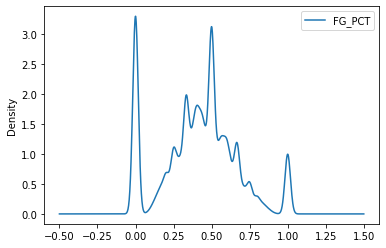

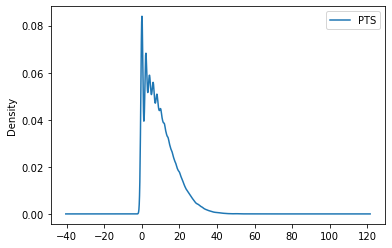

In [35]:
pd.DataFrame(t3["FG_PCT"]).plot(kind='kde');
pd.DataFrame(t3["PTS"]).plot(kind='kde');

#### Looking at the z-score for both components we can see that majority of the points were between 0-20, with an average shooting percentage of .50

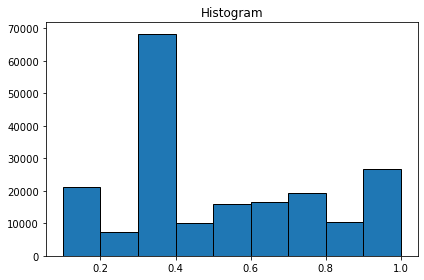

In [36]:
bins = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
plt.hist(t3["FG_PCT zscore"], bins=bins, edgecolor='black', log= False)

plt.title("Histogram") 

plt.tight_layout()
plt.show()

# Task 4: <a name="Task4"></a>

In [37]:
for col in t1_rankings.columns:
    print('{}: {} unique values'.format(col, t1_rankings[col].nunique()))

SEASON_ID: 16 unique values
TEAM: 34 unique values
W: 57 unique values
L: 57 unique values
W_PCT: 57 unique values


A very easy way to see the relationship with the target variable is to group by each feature, and then just look at the average value of the target variable. Again, since the target is ones or zeros, taking the average of that field will just tell you the percent of rows that are a one, or the percent of passengers in that group that survived.

## PCA Analysis

Principal component analysis (PCA) is an unsupervised machine learning algorithm that discovers relationships between variables and reduces variables down to a set of uncorrelated synthetic representations called principal components. For example, the dataset describes the attributes of each player and their stats. We will do is describe what key factors perhaps start position or points that most affect the customer's performance. We are going to use PCA to decompose the data into one vector that describes the factors that increase the player's performance. 


In [38]:
t4.head()

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.0,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.0,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.4,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.0,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.0,3.0,2.0,0.0,0.0,1.0,0.0


In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import datasets
from sklearn import decomposition
from sklearn.decomposition import PCA

In [40]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [41]:
t4

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.000,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.000,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.400,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.000,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.000,3.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
523746,4.0,0.444,0.500,0.857,2.0,0.0,2.0,0.0,3.0,17.0
523747,4.0,0.636,0.000,1.000,1.0,1.0,1.0,0.0,3.0,18.0
523748,4.0,0.429,0.000,0.000,8.0,0.0,1.0,0.0,3.0,6.0
523749,4.0,1.000,0.000,0.000,3.0,1.0,0.0,0.0,2.0,2.0


### PCA on games_detail dataset

In [42]:
# iris = datasets.load_iris()
pca_data = t4

X = pca_data
variable_names = pca_data.columns

X[0:10]


,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.0,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.0,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.4,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.0,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.0,3.0,2.0,0.0,0.0,1.0,0.0
5,4.0,0.167,0.000,0.0,0.0,3.0,0.0,0.0,2.0,2.0
6,4.0,0.667,0.000,1.0,9.0,2.0,0.0,1.0,0.0,15.0
7,4.0,0.222,0.143,1.0,11.0,0.0,0.0,1.0,1.0,9.0
8,4.0,0.500,0.000,1.0,1.0,1.0,0.0,0.0,0.0,6.0
9,4.0,0.167,0.333,0.0,0.0,1.0,1.0,0.0,0.0,3.0


In [43]:
pca_data.keys()

Index(['START_POSITION', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL',
       'BLK', 'PF', 'PTS'],
      dtype='object')

In [44]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([7.81515294e-01, 1.10541767e-01, 5.53751193e-02, 2.23463919e-02,
       1.11489503e-02, 9.12899540e-03, 7.10484718e-03, 1.54496209e-03,
       7.87734082e-04, 5.05938681e-04])

In [45]:
pca.explained_variance_ratio_.sum()

1.0

Here we can see that all the explained variance ratios sum up to 1. explained variance ratio tells us how much is compressed into the first few components, you can use explained ratio variance to calculate accumulated variance. then with this accumulative variance, you can figure out how many components to keep you just need to make sure that you have 70%of the original data information. 
So when we sum up the estimated variance we get the accumulated variance. some of the information we don't need because of outliers, noise in the data our goal is to remove the junk. 


In [46]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,-0.059934,0.013360,0.012225,0.026395,0.215511,0.135769,0.037659,0.019718,0.054029,0.962174
1,-0.120115,0.000131,-0.023658,-0.000768,0.951582,-0.102962,0.001064,0.095960,0.117228,-0.214363
2,-0.008769,-0.014558,-0.001601,0.003713,0.067989,0.979854,0.091923,-0.023786,0.028062,-0.158604
3,-0.107515,0.008388,-0.002907,0.012899,-0.148212,-0.027383,0.055966,0.044913,0.979559,-0.028185
4,0.958180,0.016380,0.008558,0.007658,0.123841,0.015492,-0.181494,-0.110913,0.140462,0.030704
5,0.186951,-0.002299,0.002476,0.009492,0.016055,-0.093161,0.976684,-0.025872,-0.034795,-0.014808
6,0.130104,0.015972,-0.022000,0.001109,-0.074560,0.031678,0.004117,0.986917,-0.041751,0.002320
7,0.003355,0.099591,0.160426,-0.981596,0.006780,0.006980,0.010171,0.003415,0.013975,0.019959
8,0.014707,-0.384957,-0.903191,-0.186187,-0.013796,-0.001717,0.000546,-0.016514,0.004028,0.026267
9,-0.011369,0.917006,-0.396518,0.027869,-0.008242,0.011302,0.005142,-0.023666,-0.011015,-0.008014


over here we are showing the priciple components for each row and column.

<AxesSubplot:>

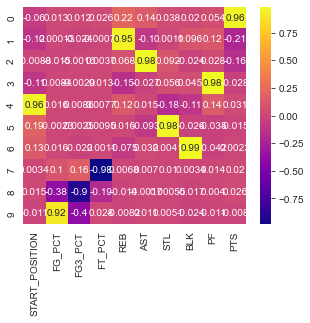

In [47]:
sb.heatmap(comps, cmap="plasma", annot=True)

This heat map shows the correlation of the principal component with the dataset. The results from our correlation heat map show that component 0 is strongly correlated with PTS and moderately correlated with STL. Component 1 is strongly correlated with REB. This information is useful when using them as input variables for ML Algorithms. The first 2 components can be used as input variables for classifiers to predict which players are the best shooters and overall players in the leauge.  

# Task 5: <a name="Task5"></a>
## Similarity Measurement
#### From your data set select the object type with most numeric dimensions. For this task we will use only numeric dimensions of that object type; so, ignore the other dimensions. If the number of numeric dimensions is more than 5 in this object type, then you many select any 5 numeric dimensions and leave the additional
##### dropping all non numeric entities, and additional numberic entities
##### Submit your filtered data, the data for the selected dimensions, in the form of a CSV file: name it as 100131001-100131002—T5Data.csv

In [48]:
df = X_2017.sample(n=10)

#### extracted 10 random rows from the Games dataset 

In [49]:
df.head(10)

,FG_PCT,FG3_PCT,FT_PCT,PTS,FG2_PCT
45,0.463,0.440,0.750,108.0,0.474
4,0.462,0.208,0.630,96.0,0.571
11,0.478,0.417,0.885,126.0,0.518
41,0.429,0.300,0.688,92.0,0.500
14,0.412,0.333,0.885,102.0,0.448
12,0.557,0.250,0.556,120.0,0.681
18,0.500,0.429,0.692,133.0,0.547
1,0.519,0.351,0.840,116.0,0.667
10,0.495,0.312,0.667,120.0,0.585
25,0.465,0.475,0.905,130.0,0.458


#### euclidean distances

In [50]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(df,df)

array([[ 0.        , 12.00323431, 18.00058096, 16.00078986,  6.00274529,
        12.00522474, 25.00020366,  8.0035246 , 12.00152565, 22.00057977],
       [12.00323431,  0.        , 30.00186279,  4.00224412,  6.00818433,
        24.00059093, 37.00073925, 20.00192526, 24.00028062, 34.00234833],
       [18.00058096, 30.00186279,  0.        , 34.00081209, 24.00033983,
         6.01406186,  7.00276503, 10.00151304,  6.00527493,  4.00094151],
       [16.00078986,  4.00224412, 34.00081209,  0.        , 10.00214432,
        28.00123335, 41.00029155, 24.00128526, 28.00021725, 38.0010628 ],
       [ 6.00274529,  6.00818433, 24.00033983, 10.00214432,  0.        ,
        18.00528933, 31.0010324 , 14.0022055 , 18.00204497, 28.00041916],
       [12.00522474, 24.00059093,  6.01406186, 28.00123335, 18.00528933,
         0.        , 13.00275901,  4.01154546,  0.17095321, 10.01152431],
       [25.00020366, 37.00073925,  7.00276503, 41.00029155, 31.0010324 ,
        13.00275901,  0.        , 17.00125728

#### this is finding the Euclidiean distances between each row with each row and each of their corresponding dimensions 

#### cosine Distance 

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(df,df)


array([[1.        , 0.99999675, 0.99999954, 0.99999891, 0.99999814,
        0.99999446, 0.99999795, 0.99999846, 0.99999782, 0.99999928],
       [0.99999675, 1.        , 0.99999703, 0.99999884, 0.99999565,
        0.99999808, 0.99999628, 0.99999932, 0.99999859, 0.99999511],
       [0.99999954, 0.99999703, 1.        , 0.99999864, 0.99999856,
        0.99999481, 0.99999834, 0.99999836, 0.99999833, 0.99999974],
       [0.99999891, 0.99999884, 0.99999864, 1.        , 0.99999854,
        0.99999523, 0.99999613, 0.99999988, 0.99999764, 0.99999737],
       [0.99999814, 0.99999565, 0.99999856, 0.99999854, 1.        ,
        0.99999013, 0.99999389, 0.99999793, 0.9999948 , 0.99999797],
       [0.99999446, 0.99999808, 0.99999481, 0.99999523, 0.99999013,
        1.        , 0.99999758, 0.99999614, 0.99999899, 0.99999317],
       [0.99999795, 0.99999628, 0.99999834, 0.99999613, 0.99999389,
        0.99999758, 1.        , 0.99999631, 0.99999938, 0.99999817],
       [0.99999846, 0.99999932, 0.9999983

#### Mahalonobis distance

In [52]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
df['mahalanobis'] = mahalanobis(x=df, data=df[['FG_PCT','FG3_PCT','FT_PCT','PTS','FG2_PCT']])

#display first five rows of dataframe
df.head()

,FG_PCT,FG3_PCT,FT_PCT,PTS,FG2_PCT,mahalanobis
45,0.463,0.440,0.750,108.0,0.474,6.498252
4,0.462,0.208,0.630,96.0,0.571,3.108570
11,0.478,0.417,0.885,126.0,0.518,1.961755
41,0.429,0.300,0.688,92.0,0.500,3.836389
14,0.412,0.333,0.885,102.0,0.448,4.108884


# task 6  <a name="Task6"></a>

#### show the resulting decision tree that splits on entropy with max_depth = 2, to find the most important shooting percentage.


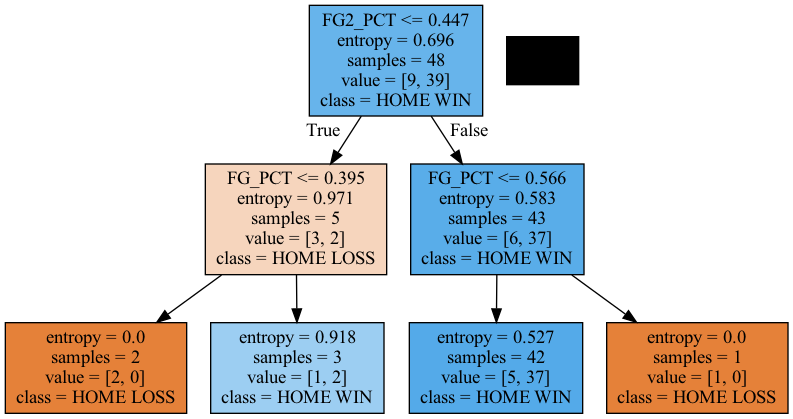

In [53]:
decTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
decTree = decTree.fit(X_2017,Y_2017)
dot_data = tree.export_graphviz(decTree, feature_names=X_2017.columns, class_names=['HOME LOSS','HOME WIN'], filled=True,
                               out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

### What shooting percentage was the best predictor for success

### Shows that shooting accurately with 2-pointers was the most important for Raptors success, followed by 3-point shooting accuracy.
##### Test the data on the 2018 data. Output -> [(number of correct predictions), (number of incorrect predictions)]


In [54]:
testX = data_18[data_18.columns.drop(drop_cols)]
testY = data_18["HOME_TEAM_WINS"]
predY = decTree.predict(testX)
testset = []
results = [0,0]
for row in testY:
    testset.append(row)
i=0
for row in predY:
    if testset[i] == row:
        results[0] += 1
    else:
        results[1] += 1
results
# testY

[50, 6]

#### Data was 95% accurate at predicting 2018 Toronto Raptors results based on shooting percentage statistics in each game.

# Task 7  <a name="Task7"></a>

We answered 3/5 of our questions, our questions are answerable but we need more analysis on the data set inroder to find the answer. The questions were answered throuout the analysis.

I Milan Drapic student ID # 215614720 acknowledge that I have contributed
at least 30% time and effort to the preparation of this report and work discussed
herein.
Student_Signature Milan Drapic

I Yudthesvar Raj student ID # 216846396 acknowledge that I have contributed
at least 30% time and effort to the preparation of this report and work discussed
herein.
Student_Signature Yudthesvar Raj

I Haris Muhammad student ID # 216359770 acknowledge that I have contributed
at least 30% time and effort to the preparation of this report and work discussed
herein.
Student_Signature Haris Muhammad